In [ ]:
!mkdir -p data/toyandgame

In [2]:
import os
import json
import pandas as pd
import pickle
import numpy as np

In [ ]:
!gzip data/toyandgame/Toys_and_Games_5.json.gz -d

In [ ]:
!ls data/toyandgame

In [16]:
TPS_DIR = 'data/toyandgame'
TP_file = os.path.join(TPS_DIR, 'Toys_and_Games_5.json')

f= open(TP_file)

In [19]:
users_id=[]
items_id=[]
ratings=[]
reviews=[]
np.random.seed(2020)

for line in f:
    js=json.loads(line)
    if str(js['reviewerID'])=='unknown':
        print("unknown")
        continue
    if str(js['asin'])=='unknown':
        print("unknown2")
        continue
    reviews.append(js.get('reviewText','None'))
    users_id.append(str(js['reviewerID'])+',')
    items_id.append(str(js['asin'])+',')
    ratings.append(str(js['overall']))


In [20]:
data=pd.DataFrame({'user_id':pd.Series(users_id),
                   'item_id':pd.Series(items_id),
                   'ratings':pd.Series(ratings),
                   'reviews':pd.Series(reviews)})[['user_id','item_id','ratings','reviews']]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827312 entries, 0 to 1827311
Data columns (total 4 columns):
user_id    object
item_id    object
ratings    object
reviews    object
dtypes: object(4)
memory usage: 55.8+ MB


In [22]:
data.head(20)

,user_id,item_id,ratings,reviews
0,"AJ8DFKPK1TM2R,","0976990709,",5.0,Christmas present
1,"A81PNSLO7YOPR,","0976990709,",5.0,Oh what fun this is for our son. He loves it &...
2,"A103XIIOCC47BX,","0976990709,",4.0,Fun but I wish the arms and legs were wired
3,"AD81H0UOVHGC,","0976990709,",5.0,My son loves this elf.
4,"A3DYULU0QDHABQ,","0976990709,",5.0,"Fantastic little elf! Nice packaging, and the ..."
5,"A1PNKVNHQPLED5,","0976990709,",5.0,This product came quickly and packaged beautif...
6,"A176J6O2DA00G3,","0976990709,",5.0,My son loves it. I wish it had velcro on the h...
7,"AWWBFV7RK9G2Q,","0976990709,",1.0,"I bought this product at Bed Bath and Beyond, ..."
8,"A1NQMIAWUAJ4MO,","0976990709,",5.0,My kids have one and love it. had to get one ...
9,"A1MEPNJUXUSL36,","0976990709,",5.0,my son absolutely loves his elf. What a great ...


In [23]:
def get_count(tp, id):
    playcount_groupbyid = tp[[id, 'ratings']].groupby(id, as_index=False)
    count = playcount_groupbyid.size()
    return count
usercount, itemcount = get_count(data, 'user_id'), get_count(data, 'item_id')

In [24]:
usercount

user_id
A0001528BGUBOEVR6T5U,     5
A0017882XAS5VJGSZF5R,     6
A00222906VX8GH7X6J6B,     7
A0039616V1YY3K317AU,      5
A0054089FR79KY0I9X7J,     5
A0080055DD81KOGDOWPS,     5
A0084095I44XW7DFH0TP,     7
A0096585SGN72YC4RMDV,     6
A0103047AS0C8QKUI0X2,     8
A01315466WGEES6IAQCS,     8
A01401629BNNGOCV1FB4,     6
A0163982I33BFLFLDW0T,    11
A01796829PKEDTH2JZ0G,     5
A0182108CPDLPRCXQUZQ,     7
A0183104KMY6KZLU8C70,     6
A01910163UJ08PFOKPI6,     7
A0196552RI15HI7JB9PW,    14
A020135981U0UNEAE4JV,     5
A0205521A6Z5LZPEQITN,     5
A0261335MGUP6K91KAAP,     9
A0263308HWXB59DMZXXZ,     8
A02851222LSCKUNF0G8V,     6
A0312972X0AKL1EYXWTQ,    12
A0389009NV7SHKIBL80J,     5
A03962101SYL9IXBU9G7,     6
A0403142PTCZBLIH0GEF,    55
A0411582HESXIBG0OEI4,    13
A0422204VM5KZUEMVY96,    11
A04398648EN1EYQIVAUQ,     6
A0441396WX3GNL93BT38,     6
                         ..
AZZC39Y816O4E,            6
AZZCLZL9KXZV0,            8
AZZCN2ZC5QM8L,           16
AZZDJWD7XM0TJ,            7
AZZDLN5XXJE3

In [25]:
itemcount

item_id
0152014764,     4
0486284115,     5
0486427706,     2
0486448789,     3
0545346193,     2
0545561647,     5
0615638996,     2
0641869665,     4
0692770445,     2
0735331146,     3
0735332258,     3
0735333467,     2
0735335109,     5
0735351228,     2
0769658237,     4
0769660835,     6
0769663192,     4
0786950072,     1
0786955554,     5
0786955708,     4
0786960426,     4
0786964502,     4
0811866858,     6
0857260979,     4
0857442414,     4
0859538362,     4
0867343125,     5
088724677X,     5
0911121013,     1
096625757X,     3
               ..
B01HHTF4KM,     9
B01HHUYB2I,     5
B01HHZ6JDC,     9
B01HHZ9MG8,    12
B01HHZHDF0,    12
B01HI5S682,     6
B01HIH1EGQ,     6
B01HIHTKJO,    18
B01HIJ953I,    10
B01HILIX6Q,     5
B01HINSSEQ,     6
B01HINU5S8,    14
B01HIS1GS6,    17
B01HISTOC6,    35
B01HISYLQK,    10
B01HIURHW8,     6
B01HIW7G36,     5
B01HIXKEX4,     5
B01HIXSU4O,    34
B01HIXSVVQ,     6
B01HIXT86S,     9
B01HIXTEIA,     6
B01HIXTFHA,    21
B01HIXTHKA,     7
B0

In [26]:
unique_uid = usercount.index
unique_sid = itemcount.index
user2id = dict((uid, i) for (i, uid) in enumerate(unique_uid))
item2id = dict((sid, i) for (i, sid) in enumerate(unique_sid))

In [27]:
for i, key in enumerate(user2id):
    if i>=len(user2id)-5:
        print(i, key, user2id[key])

208175 AZZYKX2KZ0Q82, 208175
208176 AZZYUA6JI1MO0, 208176
208177 AZZYW4YOE1B6E, 208177
208178 AZZZ6G9WZTNNX, 208178
208179 AZZZYAYJQSDOJ, 208179


In [28]:
for i, key in enumerate(item2id):
    if i>=len(item2id)-5:
        print(i, key, item2id[key])

78765 B01HIZF6FS, 78765
78766 B01HJ4GZIU, 78766
78767 B01HJ8SCA0, 78767
78768 B01HJDFWDK, 78768
78769 B01HJFAGJI, 78769


In [29]:
def numerize(tp):
    uid = list(map(lambda x: user2id[x], tp['user_id']))
    sid = list(map(lambda x: item2id[x], tp['item_id']))
    tp['user_id'] = uid
    tp['item_id'] = sid
    return tp

data=numerize(data)
tp_rating=data[['user_id','item_id','ratings']]

In [30]:
tp_rating.head(20)

,user_id,item_id,ratings
0,182650,33,5.0
1,165566,33,5.0
2,226,33,4.0
3,173444,33,5.0
4,131445,33,5.0
5,38893,33,5.0
6,10863,33,5.0
7,203506,33,1.0
8,35949,33,5.0
9,33900,33,5.0


In [31]:
n_ratings = tp_rating.shape[0]
test = np.random.choice(n_ratings, size=int(0.20 * n_ratings), replace=False)
test_idx = np.zeros(n_ratings, dtype=bool)
test_idx[test] = True

tp_1 = tp_rating[test_idx]
tp_train= tp_rating[~test_idx]

In [32]:
tp_1.shape, tp_train.shape

((365462, 3), (1461850, 3))

In [33]:
data2=data[test_idx]
data=data[~test_idx]

n_ratings = tp_1.shape[0]
test = np.random.choice(n_ratings, size=int(0.50 * n_ratings), replace=False)

test_idx = np.zeros(n_ratings, dtype=bool)
test_idx[test] = True

tp_test = tp_1[test_idx]
tp_valid = tp_1[~test_idx]

In [34]:
tp_train.shape, tp_valid.shape, tp_test.shape

((1461850, 3), (182731, 3), (182731, 3))

In [35]:
tp_train

,user_id,item_id,ratings
0,182650,33,5.0
1,165566,33,5.0
2,226,33,4.0
4,131445,33,5.0
5,38893,33,5.0
6,10863,33,5.0
7,203506,33,1.0
8,35949,33,5.0
9,33900,33,5.0
10,149343,33,2.0


In [36]:
tp_valid

,user_id,item_id,ratings
3,173444,33,5.0
15,27546,33,2.0
21,94496,33,4.0
23,118613,33,5.0
24,44303,33,4.0
32,187750,33,5.0
41,149824,33,5.0
78,12360,33,5.0
79,103766,33,5.0
81,185624,33,5.0


In [37]:
tp_test

,user_id,item_id,ratings
46,116969,33,5.0
51,66746,33,5.0
80,116705,33,5.0
92,33228,33,5.0
111,1525,33,5.0
143,61885,33,5.0
148,36750,33,5.0
159,114102,33,5.0
186,30465,33,5.0
191,174696,33,5.0


In [38]:
tp_train.to_csv(os.path.join(TPS_DIR, 'toyandgame_train.csv'), index=False,header=None)
tp_valid.to_csv(os.path.join(TPS_DIR, 'toyandgame_valid.csv'), index=False,header=None)
tp_test.to_csv(os.path.join(TPS_DIR, 'toyandgame_test.csv'), index=False,header=None)

In [39]:
!ls data/toyandgame

Toys_and_Games_5.json toyandgame_train.csv
toyandgame_test.csv   toyandgame_valid.csv


In [40]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [41]:
files.download(os.path.join(TPS_DIR, 'toyandgame_train.csv'))
files.download(os.path.join(TPS_DIR, 'toyandgame_valid.csv'))
files.download(os.path.join(TPS_DIR, 'toyandgame_test.csv'))

NameError: name 'files' is not defined

In [42]:
user_reviews={}
item_reviews={}
user_rid={}
item_rid={}

for i in data.values:
    if i[0] in user_reviews:
        user_reviews[i[0]].append(i[3])
        user_rid[i[0]].append(i[1])
    else:
        user_reviews[i[0]]=[i[3]]
        user_rid[i[0]]=[i[1]]
    if i[1] in item_reviews:
        item_reviews[i[1]].append(i[3])
        item_rid[i[1]].append(i[0])
    else:
        item_reviews[i[1]] = [i[3]]
        item_rid[i[1]]=[i[0]]


In [43]:
len(user_reviews), len(item_reviews), len(user_rid), len(item_rid)

(208159, 78751, 208159, 78751)

In [44]:
# for valid/test sets, add user/item to train set as "0" data
for i in data2.values:
    if i[0] in user_reviews:
        l=1
    else:
        user_rid[i[0]]=[0]
        user_reviews[i[0]]=['0']
        print('Added user {} to training set!'.format(i[0]))
    if i[1] in item_reviews:
        l=1
    else:
        item_rid[i[1]]=[0]
        item_reviews[i[1]] = ['0']
        print('Added item {} to training set!'.format(i[1]))
        

Added user 149507 to training set!
Added user 193927 to training set!
Added user 87919 to training set!
Added user 52959 to training set!
Added user 139181 to training set!
Added user 66672 to training set!
Added user 44095 to training set!
Added user 77604 to training set!
Added user 123243 to training set!
Added item 10208 to training set!
Added user 5577 to training set!
Added user 18948 to training set!
Added user 161677 to training set!
Added user 61809 to training set!
Added user 100934 to training set!
Added user 59031 to training set!
Added user 63305 to training set!
Added user 176940 to training set!
Added user 109869 to training set!
Added user 58174 to training set!
Added user 53652 to training set!
Added user 54071 to training set!
Added item 51328 to training set!
Added item 52047 to training set!
Added item 8 to training set!
Added item 31 to training set!
Added item 7244 to training set!
Added item 7795 to training set!
Added item 7802 to training set!
Added item 7917 t

In [45]:
len(user_reviews), len(item_reviews), len(user_rid), len(item_rid)

(208180, 78770, 208180, 78770)

In [46]:
pickle.dump(user_reviews, open(os.path.join(TPS_DIR, 'user_review'), 'wb'))
pickle.dump(item_reviews, open(os.path.join(TPS_DIR, 'item_review'), 'wb'))
pickle.dump(user_rid, open(os.path.join(TPS_DIR, 'user_rid'), 'wb'))
pickle.dump(item_rid, open(os.path.join(TPS_DIR, 'item_rid'), 'wb'))

In [47]:
!ls data/toyandgame

Toys_and_Games_5.json toyandgame_test.csv   user_review
item_review           toyandgame_train.csv  user_rid
item_rid              toyandgame_valid.csv


In [48]:
usercount, itemcount = get_count(data, 'user_id'), get_count(data, 'item_id')

print(np.sort(np.array(usercount.values)))
print(np.sort(np.array(itemcount.values)))

[  1   1   1 ... 358 404 660]
[   1    1    1 ... 1562 1767 3909]


In [49]:
len(np.array(usercount.values)), len(np.array(itemcount.values))

(208159, 78751)

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline

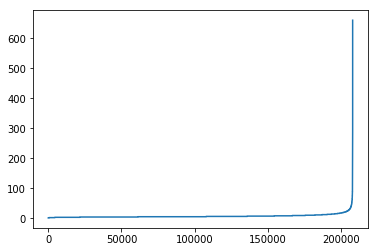

In [51]:
plt.plot(np.sort(np.array(usercount.values)))

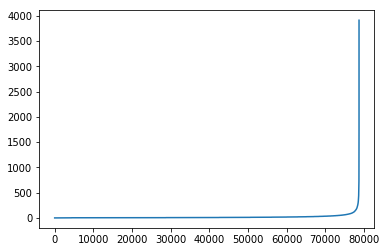

In [52]:
plt.plot(np.sort(np.array(itemcount.values)))

In [53]:
!zip -r data/toyandgame/toyandgame.zip data/toyandgame/item_review data/toyandgame/item_rid data/toyandgame/user_review data/toyandgame/user_rid

  adding: data/toyandgame/item_review (deflated 63%)
  adding: data/toyandgame/item_rid (deflated 35%)
  adding: data/toyandgame/user_review (deflated 64%)
  adding: data/toyandgame/user_rid (deflated 36%)


In [54]:
files.download('toyandgame.zip')

NameError: name 'files' is not defined

In [55]:
f.close()

# Data Preprocessing

In [56]:
!ls data/toyandgame

Toys_and_Games_5.json toyandgame.zip        toyandgame_valid.csv
item_review           toyandgame_test.csv   user_review
item_rid              toyandgame_train.csv  user_rid


In [57]:
import numpy as np
import re
import itertools
from collections import Counter

import tensorflow as tf
import csv
import pickle
import os

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [58]:
tf.__version__

'2.0.0'

In [59]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [60]:
def pad_sentences(u_text, u_len, u2_len, padding_word="<PAD/>"):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
    review_num = u_len
    review_len = u2_len

    u_text2 = {}
    for i in u_text.keys():
        u_reviews = u_text[i]
        padded_u_train = []
        for ri in range(review_num):
            if ri < len(u_reviews):
                sentence = u_reviews[ri]
                if review_len > len(sentence):
                    num_padding = review_len - len(sentence)
                    new_sentence = sentence + [padding_word] * num_padding
                    padded_u_train.append(new_sentence)
                else:
                    new_sentence = sentence[:review_len]
                    padded_u_train.append(new_sentence)
            else:
                new_sentence = [padding_word] * review_len
                padded_u_train.append(new_sentence)
        u_text2[i] = padded_u_train

    return u_text2

In [61]:
def pad_reviewid(u_train, u_valid, u_len, pad_num):
    pad_u_train = []
    for i in range(len(u_train)):
        x = u_train[i]
        while u_len > len(x):
            x.append(pad_num)
        if u_len < len(x):
            x = x[:u_len]
        pad_u_train.append(x)
    
    pad_u_valid = []
    for i in range(len(u_valid)):
        x = u_valid[i]
        while u_len > len(x):
            x.append(pad_num)
        if u_len < len(x):
            x = x[:u_len]
        pad_u_valid.append(x)
        
    return pad_u_train, pad_u_valid

In [62]:
def build_vocab(sentences1, sentences2):
    """
    Builds a vocabulary mapping from word to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts1 = Counter(itertools.chain(*sentences1))
    # Mapping from index to word
    vocabulary_inv1 = [x[0] for x in word_counts1.most_common()]
    vocabulary_inv1 = sorted(vocabulary_inv1)
    # Mapping from word to index
    vocabulary1 = {x: i for i, x in enumerate(vocabulary_inv1)}

    word_counts2 = Counter(itertools.chain(*sentences2))
    # Mapping from index to word
    vocabulary_inv2 = [x[0] for x in word_counts2.most_common()]
    vocabulary_inv2 = sorted(vocabulary_inv2)
    # Mapping from word to index
    vocabulary2 = {x: i for i, x in enumerate(vocabulary_inv2)}
    return (vocabulary1, vocabulary_inv1, vocabulary2, vocabulary_inv2)


In [63]:
def build_input_data(u_text, i_text, vocabulary_u, vocabulary_i):
    """
    Maps sentencs and labels to vectors based on a vocabulary.
    """
    l = len(u_text)
    u_text2 = {}
    for i in u_text.keys():
        u_reviews = u_text[i]
        u_rev_new = np.array([[vocabulary_u[word] for word in words] for words in u_reviews])
        u_text2[i] = u_rev_new
    l = len(i_text)
    i_text2 = {}
    for j in i_text.keys():
        i_reviews = i_text[j]
        i_rev_new = np.array([[vocabulary_i[word] for word in words] for words in i_reviews])
        i_text2[j] = i_rev_new
    return u_text2, i_text2

In [64]:
def load_data_and_labels(train_data, valid_data, user_review, item_review, user_rid, item_rid, stopwords):
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files

    f_train = open(train_data, 'r')
    f1 = open(user_review, 'rb')
    f2 = open(item_review, 'rb')
    f3 = open(user_rid, 'rb')
    f4 = open(item_rid, 'rb')

    user_reviews = pickle.load(f1)
    item_reviews = pickle.load(f2)
    user_rids = pickle.load(f3)
    item_rids = pickle.load(f4)

    print("train")
    reid_user_train = []
    reid_item_train = []
    uid_train = []
    iid_train = []
    y_train = []

    u_text = {}
    u_rid = {}
    i_text = {}
    i_rid = {}

    for line in f_train:
        line = line.split(',')
        uid_train.append(int(line[0]))
        iid_train.append(int(line[1]))
        if int(line[0]) in u_text:
            reid_user_train.append(u_rid[int(line[0])])
        else:
            u_text[int(line[0])] = []
            for s in user_reviews[int(line[0])]:
                s1 = clean_str(s)
                s1 = s1.split(" ")
                u_text[int(line[0])].append(s1)
            u_rid[int(line[0])] = []
            for s in user_rids[int(line[0])]:
                u_rid[int(line[0])].append(int(s))
            reid_user_train.append(u_rid[int(line[0])])

        if int(line[1]) in i_text:
            reid_item_train.append(i_rid[int(line[1])])
        else:
            i_text[int(line[1])] = []
            for s in item_reviews[int(line[1])]:
                s1 = clean_str(s)
                s1 = s1.split(" ")
                i_text[int(line[1])].append(s1)
            i_rid[int(line[1])] = []
            for s in item_rids[int(line[1])]:
                i_rid[int(line[1])].append(int(s))
            reid_item_train.append(i_rid[int(line[1])])

        y_train.append(float(line[2]))

    print("valid")
    f_valid = open(valid_data, 'r')

    reid_user_valid = []
    reid_item_valid = []
    uid_valid = []
    iid_valid = []
    y_valid = []

    for line in f_valid:
        line = line.split(',')
        uid_valid.append(int(line[0]))
        iid_valid.append(int(line[1]))
        if int(line[0]) in u_text:
            reid_user_valid.append(u_rid[int(line[0])])
        else:
            print("Added user", int(line[0]))
            u_text[int(line[0])] = [['<PAD/>']]
            u_rid[int(line[0])] = [int(0)]
            reid_user_valid.append(u_rid[int(line[0])])

        if int(line[1]) in i_text:
            reid_item_valid.append(i_rid[int(line[1])])
        else:
            print("Added item", int(line[1]))
            i_text[int(line[1])] = [['<PAD/>']]
            i_rid[int(line[1])] = [int(0)]
            reid_item_valid.append(i_rid[int(line[1])])

        y_valid.append(float(line[2]))

    print("len")
    review_num_u = np.array([len(x) for x in u_text.values()])
    x = np.sort(review_num_u)
    u_len = x[int(0.9 * len(review_num_u)) - 1]
    review_len_u = np.array([len(j) for i in u_text.values() for j in i])
    x2 = np.sort(review_len_u)
    u2_len = x2[int(0.9 * len(review_len_u)) - 1]
    review_num_i = np.array([len(x) for x in i_text.values()])
    y = np.sort(review_num_i)
    i_len = y[int(0.9 * len(review_num_i)) - 1]
    review_len_i = np.array([len(j) for i in i_text.values() for j in i])
    y2 = np.sort(review_len_i)
    i2_len = y2[int(0.9 * len(review_len_i)) - 1]

    print("u_len:", u_len)
    print("i_len:", i_len)
    print("u2_len:", u2_len)
    print("i2_len:", i2_len)
    user_num = len(u_text)
    item_num = len(i_text)
    print("user_num:", user_num)
    print("item_num:", item_num)
    return (u_text, i_text, y_train, y_valid, u_len, i_len, u2_len, i2_len,\
            uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
            reid_user_train, reid_item_train, reid_user_valid, reid_item_valid)

In [65]:
def load_and_preprocess_data(train_data, valid_data, user_review, item_review, user_rid, item_rid, stopwords):
    """
    Loads and preprocessed data for the MR dataset.
    Returns input vectors, labels, vocabulary, and inverse vocabulary.
    """
    # Load and preprocess data

    u_text, i_text, y_train, y_valid, u_len, i_len, u2_len, i2_len,\
    uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
    reid_user_train, reid_item_train, reid_user_valid, reid_item_valid\
    = load_data_and_labels(train_data, valid_data, user_review, item_review, user_rid, item_rid, stopwords)
    print('load data done')

    u_text = pad_sentences(u_text, u_len, u2_len)
    reid_user_train, reid_user_valid = pad_reviewid(reid_user_train, reid_user_valid, u_len, item_num + 1)
    print('pad user done')

    i_text = pad_sentences(i_text, i_len, i2_len)
    reid_item_train, reid_item_valid = pad_reviewid(reid_item_train, reid_item_valid, i_len, user_num + 1)
    print('pad item done')

    user_voc = [xx for x in u_text.values() for xx in x]
    item_voc = [xx for x in i_text.values() for xx in x]    
    vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item = build_vocab(user_voc, item_voc)
    print(len(vocabulary_user))
    print(len(vocabulary_item))

    u_text, i_text = build_input_data(u_text, i_text, vocabulary_user, vocabulary_item)
    y_train = np.array(y_train)
    y_valid = np.array(y_valid)
    uid_train = np.array(uid_train)
    uid_valid = np.array(uid_valid)
    iid_train = np.array(iid_train)
    iid_valid = np.array(iid_valid)
    reid_user_train = np.array(reid_user_train)
    reid_user_valid = np.array(reid_user_valid)
    reid_item_train = np.array(reid_item_train)
    reid_item_valid = np.array(reid_item_valid)

    return (u_text, i_text, y_train, y_valid,\
            vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item,\
            uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
            reid_user_train, reid_item_train, reid_user_valid, reid_item_valid)

In [66]:
TPS_DIR = 'data/toyandgame'

In [67]:
train_data = os.path.join(TPS_DIR, 'toyandgame_train.csv')
valid_data = os.path.join(TPS_DIR, 'toyandgame_valid.csv')
user_review = os.path.join(TPS_DIR, 'user_review')
item_review = os.path.join(TPS_DIR, 'item_review')
user_rid = os.path.join(TPS_DIR, 'user_rid')
item_rid = os.path.join(TPS_DIR, 'item_rid')

In [68]:
u_text, i_text, y_train, y_valid,\
vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item,\
uid_train, iid_train, uid_valid, iid_valid, user_num, item_num,\
reid_user_train, reid_item_train, reid_user_valid, reid_item_valid\
= load_and_preprocess_data(train_data, valid_data, user_review, item_review, user_rid, item_rid, None)

train
valid
Added user 149507
Added user 66672
Added user 77604
Added user 123243
Added user 5577
Added user 18948
Added user 139181
Added user 161677
Added user 61809
Added user 100934
Added user 59031
Added user 63305
Added user 193927
Added user 109869
Added user 53652
Added user 52959
Added user 54071
Added user 176940
Added item 51328
Added item 52047
Added user 44095
Added user 58174
Added user 87919
Added item 8
Added item 7244
Added item 7802
Added item 7914
Added item 7991
Added item 8172
Added item 8268
Added item 8778
Added item 9226
Added item 10092
Added item 10249
Added item 63030
len
u_len: 12
i_len: 38
u2_len: 103
i2_len: 103
user_num: 208180
item_num: 78765
load data done
pad user done
pad item done
110799
109139


In [69]:
np.random.seed(2020)
shuffle_indices = np.random.permutation(np.arange(len(y_train)))

In [70]:
len(y_train), len(uid_train), len(iid_train), len(reid_user_train), len(reid_item_train)

(1461850, 1461850, 1461850, 1461850, 1461850)

In [71]:
len(y_valid), len(uid_valid), len(iid_valid), len(reid_user_valid), len(reid_item_valid)

(182731, 182731, 182731, 182731, 182731)

In [72]:
userid_train = uid_train[shuffle_indices]
itemid_train = iid_train[shuffle_indices]
y_train = y_train[shuffle_indices]
reid_user_train = reid_user_train[shuffle_indices]
reid_item_train = reid_item_train[shuffle_indices]

In [73]:
y_train = y_train[:, np.newaxis]
y_valid = y_valid[:, np.newaxis]

userid_train = userid_train[:, np.newaxis]
itemid_train = itemid_train[:, np.newaxis]
userid_valid = uid_valid[:, np.newaxis]
itemid_valid = iid_valid[:, np.newaxis]

In [74]:
batches_train = list(zip(userid_train, itemid_train, reid_user_train, reid_item_train, y_train))
batches_test = list(zip(userid_valid, itemid_valid, reid_user_valid, reid_item_valid, y_valid))
print('write begin')
output = open(os.path.join(TPS_DIR, 'toyandgame.train'), 'wb')
pickle.dump(batches_train, output)
output = open(os.path.join(TPS_DIR, 'toyandgame.test'), 'wb')
pickle.dump(batches_test, output)

write begin


In [77]:
import pickle

class MacOSFile(object):

    def __init__(self, f):
        self.f = f

    def __getattr__(self, item):
        return getattr(self.f, item)

    def read(self, n):
        # print("reading total_bytes=%s" % n, flush=True)
        if n >= (1 << 31):
            buffer = bytearray(n)
            idx = 0
            while idx < n:
                batch_size = min(n - idx, 1 << 31 - 1)
                # print("reading bytes [%s,%s)..." % (idx, idx + batch_size), end="", flush=True)
                buffer[idx:idx + batch_size] = self.f.read(batch_size)
                # print("done.", flush=True)
                idx += batch_size
            return buffer
        return self.f.read(n)

    def write(self, buffer):
        n = len(buffer)
        print("writing total_bytes=%s..." % n, flush=True)
        idx = 0
        while idx < n:
            batch_size = min(n - idx, 1 << 31 - 1)
            print("writing bytes [%s, %s)... " % (idx, idx + batch_size), end="", flush=True)
            self.f.write(buffer[idx:idx + batch_size])
            print("done.", flush=True)
            idx += batch_size


def pickle_dump(obj, file_path):
    with open(file_path, "wb") as f:
        return pickle.dump(obj, MacOSFile(f), protocol=pickle.HIGHEST_PROTOCOL)


def pickle_load(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(MacOSFile(f))

In [80]:
para = {}
para['user_num'] = user_num
para['item_num'] = item_num
para['review_num_u'] = u_text[0].shape[0]
para['review_num_i'] = i_text[0].shape[0]
para['review_len_u'] = u_text[1].shape[1]
para['review_len_i'] = i_text[1].shape[1]
para['user_vocab'] = vocabulary_user
para['item_vocab'] = vocabulary_item
para['train_length'] = len(y_train)
para['test_length'] = len(y_valid)
para['u_text'] = u_text
para['i_text'] = i_text
#output = open(os.path.join(TPS_DIR, 'toyandgame.para'), 'wb')
output = os.path.join(TPS_DIR, 'toyandgame.para')
# Pickle dictionary using protocol 0.
pickle_dump(para, output)

writing total_bytes=4543037373...
writing bytes [0, 1073741824)... done.
writing bytes [1073741824, 2147483648)... done.
writing bytes [2147483648, 3221225472)... done.
writing bytes [3221225472, 4294967296)... done.
writing bytes [4294967296, 4543037373)... done.


In [81]:
!ls -l data/toyandgame

total 14811328
-rw-r--r--@ 1 apple  staff   875846367 May 13 08:51 Toys_and_Games_5.json
-rw-r--r--  1 apple  staff   347523963 May 13 20:35 item_review
-rw-r--r--  1 apple  staff     7282841 May 13 20:35 item_rid
-rw-r--r--  1 apple  staff  4543037373 May 13 21:47 toyandgame.para
-rw-r--r--  1 apple  staff   128642429 May 13 21:33 toyandgame.test
-rw-r--r--  1 apple  staff  1029144763 May 13 21:31 toyandgame.train
-rw-r--r--  1 apple  staff   264345011 May 13 20:36 toyandgame.zip
-rw-r--r--  1 apple  staff     2973208 May 13 20:32 toyandgame_test.csv
-rw-r--r--  1 apple  staff    23783062 May 13 20:32 toyandgame_train.csv
-rw-r--r--  1 apple  staff     2973051 May 13 20:32 toyandgame_valid.csv
-rw-r--r--  1 apple  staff   349206263 May 13 20:35 user_review
-rw-r--r--  1 apple  staff     7338566 May 13 20:35 user_rid


In [82]:
!zip -r data/toyandgame/toyandgame_batch_para.zip data/toyandgame/toyandgame.train data/toyandgame/toyandgame.test data/toyandgame/toyandgame.para

  adding: data/toyandgame/toyandgame.train (deflated 69%)
  adding: data/toyandgame/toyandgame.test (deflated 79%)
  adding: data/toyandgame/toyandgame.para (deflated 96%)
